In [1]:
import pandas as pd
df = pd.read_csv('online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [2]:
data = df.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.duplicated().sum()

5268

In [5]:
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(536642, 8)

In [8]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135037
Country             0
dtype: int64

In [9]:
data['Description'] = data['Description'].fillna('s')

In [10]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135037
Country             0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
data.shape

(401605, 8)

In [14]:
data['Customer ID'].shape

(401605,)

In [15]:
data.duplicated().sum()

0

In [16]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64

In [17]:
data[data['Description'] == 's']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [18]:
df['StockCode'].groupby(df['Description']).value_counts()

Description                     StockCode
 4 PURPLE FLOCK DINNER CANDLES  72800B        41
 50'S CHRISTMAS GIFT BAG LARGE  23437        130
 DOLLY GIRL BEAKER              23345        181
 I LOVE LONDON MINI BACKPACK    23391         88
 I LOVE LONDON MINI RUCKSACK    23391          1
                                            ... 
wrongly marked carton 22804     85123A         1
wrongly marked. 23343 in box    20713          1
wrongly sold (22719) barcode    22467          1
wrongly sold as sets            85172          1
wrongly sold sets               85175          1
Name: StockCode, Length: 4792, dtype: int64

In [19]:
import re
data['StockCode'] = data['StockCode'].str.replace('[A-Z]',"", regex=True)

In [20]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [21]:
data['StockCode'] = data['StockCode'].str.strip()

In [22]:
data['StockCode'] = pd.to_numeric(data['StockCode'])

In [23]:
data.dropna(inplace=True)

In [24]:
data['StockCode'] = data['StockCode'].astype(int)

In [25]:
data['Customer ID'] = data['Customer ID'].astype(int)

In [26]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399823 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      399823 non-null  object        
 1   StockCode    399823 non-null  int64         
 2   Description  399823 non-null  object        
 3   Quantity     399823 non-null  int64         
 4   InvoiceDate  399823 non-null  datetime64[ns]
 5   Price        399823 non-null  float64       
 6   Customer ID  399823 non-null  int64         
 7   Country      399823 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.5+ MB


In [28]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [29]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [30]:
quant = (data['Quantity']<0)

In [31]:
x= data[quant].index
x

Int64Index([   154,    235,    236,    237,    238,    239,    240,    241,
               937,   1441,
            ...
            540091, 540141, 540142, 540143, 540422, 540448, 540449, 541715,
            541716, 541717],
           dtype='int64', length=8507)

In [32]:
data.drop(x, inplace=True)

In [33]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [34]:
data['Invoice'] = data['Invoice'].astype(int)

In [35]:
data['Country'] = data['Country'].str.replace('EIRE','Ireland')

In [36]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391316 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      391316 non-null  int64         
 1   StockCode    391316 non-null  int64         
 2   Description  391316 non-null  object        
 3   Quantity     391316 non-null  int64         
 4   InvoiceDate  391316 non-null  datetime64[ns]
 5   Price        391316 non-null  float64       
 6   Customer ID  391316 non-null  int64         
 7   Country      391316 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 26.9+ MB


In [38]:
data.describe()

,Invoice,StockCode,Quantity,Price,Customer ID
count,391316.000000,391316.000000,391316.000000,391316.000000,391316.000000
mean,560592.908177,30761.750641,13.175528,2.890193,15294.841072
std,13087.128569,20620.292708,181.876625,4.375175,1710.167127
min,536365.000000,2.000000,1.000000,0.000000,12346.000000
25%,549235.000000,22027.000000,2.000000,1.250000,13969.000000
50%,561875.000000,22666.000000,6.000000,1.950000,15157.000000
75%,572062.000000,23270.000000,12.000000,3.750000,16794.000000
max,581587.000000,90214.000000,80995.000000,649.500000,18287.000000


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f720bbe3190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f720bbe36d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f720bbe2ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f720b9f3c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f720b9f3f10>],
 'means': []}

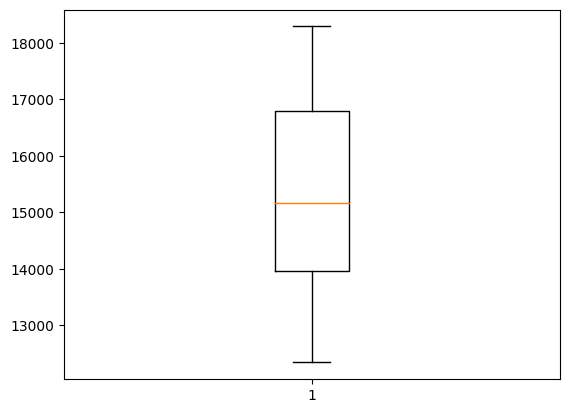

In [41]:
plt.boxplot(data['Customer ID'])

<Axes: >

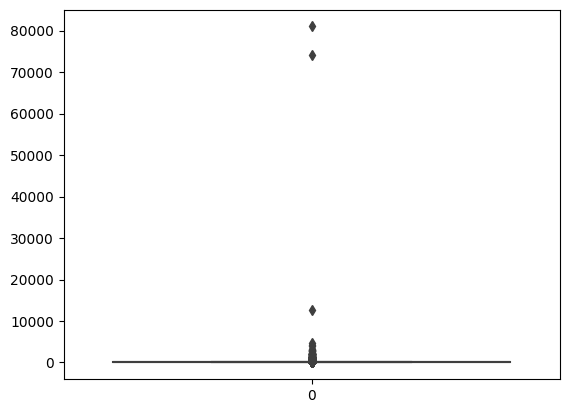

In [46]:
sns.boxplot(data['Quantity'])

In [54]:
data['Description'].groupby(df['InvoiceDate']).count().sort_values(ascending=False)#.nlargest(1)

InvoiceDate
11/14/2011 15:27    541
11/28/2011 15:54    532
12/5/2011 17:17     528
11/23/2011 13:39    442
10/31/2011 14:09    434
                   ... 
5/11/2011 12:45       1
10/5/2011 13:00       1
7/14/2011 13:20       1
10/12/2011 9:38       1
5/22/2011 11:38       1
Name: Description, Length: 17172, dtype: int64